 K-NEAREST NEIGHBOURS 

*   Import Numpy module for mathematicsl calulations
*   Import Pandas for Data Pre-processing
*   Import Matplotlib for Data Visualisation





In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load the required Datasets

In [ ]:
data = pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
ans=pd.read_csv('gender_submission.csv')

Segregate the features that are required to Train the Machine Learning model

In [ ]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target = 'Survived'
data = data[features + [target]]

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
test = test[features]

#print(data)

Seperate the Target Variable from the fetaures

In [ ]:
X = data.drop('Survived', axis=1)  # Features
y = data['Survived']  # Target variable
#print(test_ans)

**Data Pre-Processing**

*   Mapping Gender attribute to some Integer values 
*   Replacing the Missing values present in Age and Fare attributes with Median



Data pre-processing Done for both training and testing data

In [ ]:
#mapping Sex attributes to numerical vlaues based on gender
data['Sex'] = data['Sex'].map({'female': 0, 'male': 1})
# Handle missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)

In [ ]:
#mapping Sex attributes to numerical vlaues based on gender
test['Sex'] = test['Sex'].map({'female': 0, 'male': 1})
# Handle missing values
test['Age'].fillna(test['Age'].median(), inplace=True)
test['Fare'].fillna(test['Fare'].median(), inplace=True)

In [ ]:
# Split the dataset into training and testing sets
X = data.drop('Survived', axis=1)
y = data['Survived']
test_ans=ans['Survived']

Assigning training and testing data to X_train,y_train,X_test,y_test variables

In [ ]:
X_train = X
X_test=test
y_train=y
y_test=test_ans

Calculating Eucledian Disatnce

In [ ]:
# KNN Algorithm
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [ ]:
class KNN:
    def __init__(self, k=3):             #constructor
        self.k = k

    def fit(self, X_train, y_train):     #This function is used to fit the model
        self.X_train = X_train
        self.y_train = y_train
    
    def predict_proba(self, X):         #This Function is use to calculate distance of each test example from list of all training examples
        probabilities = []
        for x in X:
            distances = [euclidean_distance(x, x_train) for x_train in self.X_train]  #finding Eucledian distance from each test example to all available training examples
            k_indices = np.argsort(distances)[:self.k]           # K-nearest indices are identified
            k_nearest_labels = [self.y_train[i] for i in k_indices]  #corresponding labels of K-Nearest Indices are obtained
            counts = np.bincount(k_nearest_labels)
            probabilities.append(counts / self.k)  
        return np.array(probabilities)

    def predict(self, X):      #Pass each test_example to _predict function       
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Return the most common class label
        most_common = max(set(k_nearest_labels), key=k_nearest_labels.count)
        return most_common

In [ ]:
# Create and train the KNN classifier
knn = KNN(k=3)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)
# Calculate accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy))

Accuracy: 1


Plot for Confusion Matrix

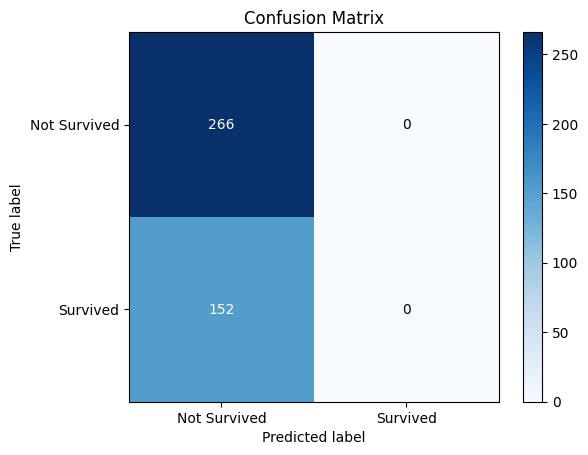

In [ ]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a figure and axes for the plot
fig, ax = plt.subplots()

# Display the confusion matrix as an image with a color map
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

# Add a color bar to the plot
ax.figure.colorbar(im, ax=ax)

# Define the class labels
classes = ['Not Survived', 'Survived']

# Set the x-axis and y-axis labels, tick locations, and tick labels
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Set the threshold value for text coloring
thresh = cm.max() / 2

# Add text annotations for each cell in the confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

# Display the plot
plt.show()


Plot for ROC Curve

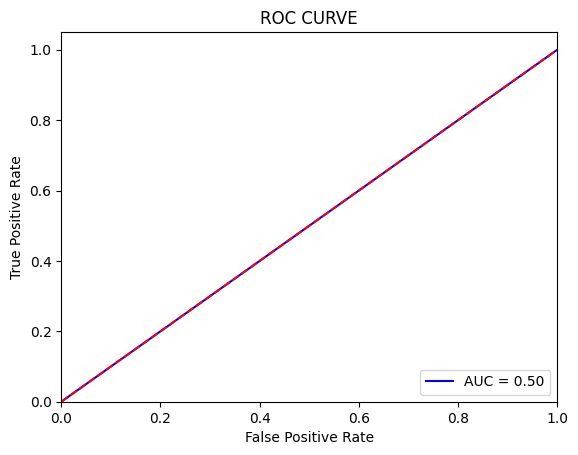

In [ ]:
# Import necessary libraries
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute the predicted probabilities for the positive class (Survived)
probs = knn.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)

# Add a dashed line representing the random classifier
plt.plot([0, 1], [0, 1], 'r--')

# Set the x-axis and y-axis limits
plt.xlim([0, 1])
plt.ylim([0, 1.05])

# Set the x-axis and y-axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Set the title of the plot
plt.title('ROC Curve')

# Add a legend to the plot
plt.legend(loc='lower right')

# Display the plot
plt.show()
